# Project 3 - Behavioral Cloning

## Problem to solve: Train a neural network capable of driving a car in a simulation environment.

This training is done with the input information (on this case images) captured from the simulator and the respective steering angle for each set of images (they will work as labels/outputs).

The training set used was the one provided by Udacity.
Only images from the centre camera were used in this project.
I've tried to create my own training data by recording myself running the simulator but I found that the angles were too "sharp/extreme".

EDIT: SUBMISSION #3: On submission number 2 the car drove very well most of the course but went off track at the first curve left after the bridge. After some trial and error (that even included trying new architectures, i.e: comma and NVIDIA) I've decided to increase the amount of available input data in relation to the previous submission and also go with HSV color mode instead of RGB.

In order to do this I've started to use the left and right cameras, in addition to flip each set of images (left, centre and right camera) 180deg.

Additionally, my mentor also suggested me to try to reduce the 0degree inputs, and that was exactly what I have done: I've discarded 0degree steering angle inputs when these were appearing more than 3 times in a row in the training set.

Example of a raw centre camera image that will be used as input of the NN:
Original Image. Size:320x160x3


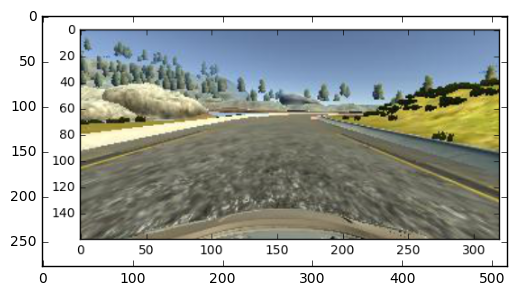

In [3]:
#example of a raw centre camera image that will be used as input of the NN:

import matplotlib.pyplot as plt
print("Example of a raw centre camera image that will be used as input of the NN:")
print("Original Image. Size:320x160x3")
image = plt.imread('./Original 160x320x3.png')
plt.imshow(image)
plt.show()

### Image pre-processing

In order to improve the model training, some image pre-processing was done.
All the training images were pre-processed in order to make it easier for the NN to classify them:
-Augment brightness (after my mentor suggested me to see a medium.com account - https://medium.com/@vivek.yadav/improved-performance-of-deep-learning-neural-network-models-on-traffic-sign-classification-using-6355346da2dc#.n4wqmiwzc)
-Normalization
-Image crop to try to better isolate the road/lines (training images were crop from the top until nearly the middle point of the image.
-All images were later converted to float16 to make the training more "resource friendly". I didn't find any major loss of accuracy by reducing the size/type of data.
-To reduce the memory necessary to train the model the images were shrunk to 50x50 (initial being 160,320)

Example of an image where Augment brightness, cropping and resizing was perfomed, HSV channel was chosen as the output of the image preprocessing:


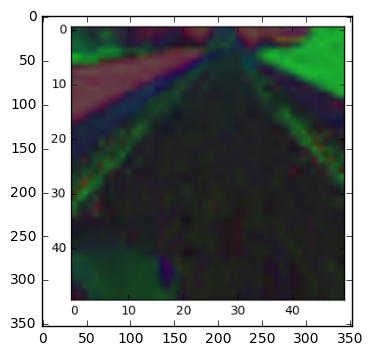

In [6]:
print("Example of an image where Augment brightness, cropping and resizing was perfomed, HSV channel was chosen as the output of the image preprocessing:")
image2 = plt.imread('./HSV.png')
plt.imshow(image2)
plt.show()   

### Training strategy
The original training set was composed by 25297 inputs/images each one with the following size 50x50x3.
From this original training set, 10% was reserved for testing the model, and from the remaining 90%, 20% served as validation set.

### Model architecture:
I've started using the model architecture used in the Keras lab, but when I was running the model in the simulation the car was sent off road after entering the first curve.
I've added a couple more convolution layers, more fully connected layers alongside with dropouts to prevent overfitting.
Here is the final model architecture after several sessions of trial and error:

Input shape: Image set with dimension 50x50
Layer 1: Convolution, 64 output filters, kernel 3x3, with Max Pooling 2x2 and with ELU activation
Layer 2: Convolution, 32 output filters, kernel 3x3, with Max Pooling 2x2 and with ELU activation
Layer 3: Convolution, 16 output filters, kernel 3x3, with Max Pooling 2x2 and with ELU activation
Layer 4: Convolution, 8 output filters, kernel 3x3, with ELU activation and with 50% dropout
Layer 5: Output flattening
Layer 6: Fully connected layer with 160 outputs and ELU activation
Layer 7: Fully connected layer with 160 outputs and ELU activation
Layer 8: Fully connected layer with 160 outputs and ELU activation
Layer 9: Fully connected layer with 128 outputs and ELU activation
Layer 9: Fully connected layer with 128 outputs and ELU activation
Layer 10: Fully connected layer with 64 outputs and ELU activation
Layer 11: Fully connected layer with 64 outputs and ELU activation
Layer 12: Fully connected layer with 32 outputs and ELU activation
Layer 13: Fully connected layer with 32 outputs, ELU activation and 50% dropout
Final Layer: FCL with 1 output -> steering angle

                     
Some notes regarding model architecture:                     
after a couple of trial and error iterations I had the error InvalidArgumentError: Received a label value of 1 which is outside the valid range of [0, 1).  Label values: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
Saw somebody with the same problem in the forum and it was recommended to check activation functions on keras docs (https://carnd-forums.udacity.com/questions/35229158/p3-avoid-predicted-steering-angles-outside-0-1-)
The error function was changed from "sparse_categorical_crossentropy" to "mean square error" because of this.
It was also suggested to change the activation functions and after going back and forth with TANH/ELU/RELU, it seems that ELU was giving better results.

### Model training:
To train the model an Adam optimizer was used.
The error function chosen was mean square error as stated before.
I've started to train the model with 10 epochs, but as stated in the "Further Help" topic provided by Udacity (https://carnd-forums.udacity.com/questions/26214464/behavioral-cloning-cheatsheet), 5 epochs were enough.

After the model is trained, the weights and model info are saved respectively to model.h5 and model.json.

### Extra notes:
-I found it very difficult to assess my model since with all the iterations that I have done (add layer, change epochs, change batch size, max pooling, dropouts etc.) the training accuracy was always between 0.45-0.55
-The only method to see if I was going on the right direction was to run the model/simulation

## Edit - Submission 2:
For submission 2, few things were changed, namely:
-This README.md file was improved with headings for better readability.
-The "1xSPECIFICATION REQUIRES CHANGES" point as stated in project review 1 was fixed and now new information such as how the dataset was generated and examples of images from the dataset are included.
-the file drive.py was changed to include the suggestion stated in code review 1, and now the speed is controled according to the steering angle, which has improved the car route.
    

## Edit - Submission 3:
For submission 3, few things were changed, namely:
-Generation of more input data by using also the left and right camera images, and by flipping all the images and multiply the respective steering angle by -1.
-HSV color mode was used now instead of RGB
-Images resized to 50x50
-Reduction of 0 steering angle inputs.

-With these changes the car completes the circuit now: https://youtu.be/klarrYroQpY